In [2]:
import tensorflow
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img,img_to_array,load_img
import matplotlib as mt
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Activation
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout


In [4]:
# Create an image instance of the ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.2,
    zoom_range=0.2,
    rescale=1./255,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 16
train_data = train_datagen.flow_from_directory(
    'C:/Users/MEGHA/OneDrive/Desktop/Practice Exercise/DL with Python/bike vs car/Bike and Car/Train',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    'C:/Users/MEGHA/OneDrive/Desktop/Practice Exercise/DL with Python/bike vs car/Bike and Car/Test',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)



Found 508 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


In [5]:
model = Sequential()

# 1st convolution layer
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# 2nd convolution layer
model.add(Conv2D(64, (3, 3),input_shape=(150,150,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# 3rd convolution layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Converting multi-dimensional to 1D array
model.add(Flatten())
model.add(Dense(units=150, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 32)       

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
result=model.fit(train_data,
                 steps_per_epoch=48//batch_size,epochs=30,
                 validation_data=test_data,
                 validation_steps=48//batch_size)

Epoch 1/30
3/3 [==============================] - 2s 723ms/step - loss: 0.5521 - accuracy: 0.5227 - val_loss: 0.4276 - val_accuracy: 0.7500
Epoch 2/30
3/3 [==============================] - 2s 601ms/step - loss: 0.4753 - accuracy: 0.7708 - val_loss: 0.5344 - val_accuracy: 0.6667
Epoch 3/30
3/3 [==============================] - 2s 562ms/step - loss: 0.4430 - accuracy: 0.6875 - val_loss: 0.8557 - val_accuracy: 0.5625
Epoch 4/30
3/3 [==============================] - 2s 669ms/step - loss: 0.3770 - accuracy: 0.7500 - val_loss: 0.6176 - val_accuracy: 0.7292
Epoch 5/30
3/3 [==============================] - 2s 615ms/step - loss: 0.4472 - accuracy: 0.8333 - val_loss: 0.7689 - val_accuracy: 0.6875
Epoch 6/30
3/3 [==============================] - 2s 573ms/step - loss: 0.4814 - accuracy: 0.7917 - val_loss: 0.6929 - val_accuracy: 0.6875
Epoch 7/30
3/3 [==============================] - 1s 507ms/step - loss: 0.3558 - accuracy: 0.8542 - val_loss: 0.4235 - val_accuracy: 0.8125
Epoch 8/30
3/3 [====

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


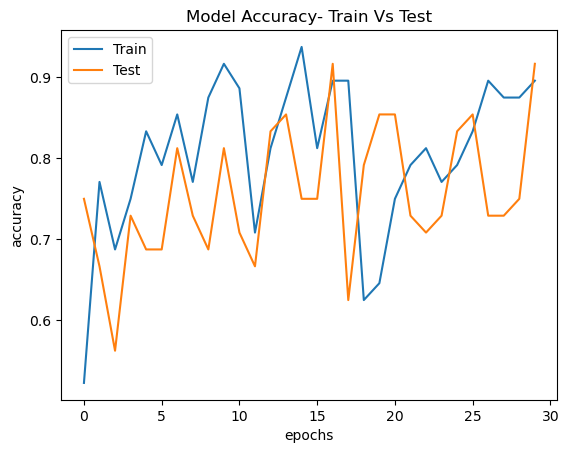

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

print(result.history.keys())
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model Accuracy- Train Vs Test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.show()

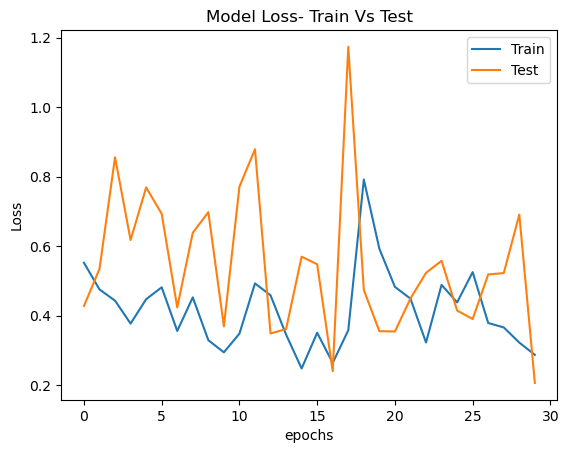

In [12]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model Loss- Train Vs Test')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['Train','Test'])
plt.show()

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPool2D
from keras import backend as k

In [15]:
batch_size=128
num_classes=10
epochs=12

In [17]:
#input image dimentions
img_rows,img_cols=32,32


In [18]:
from keras.datasets import cifar100

#download cifar10 data and split into train and test sets

(xtrain,ytrain),(xtest,ytest)=cifar100.load_data()

In [19]:
print('Training set images shape: {}'.format(xtrain.shape))
print('Testing set images shape: {}'.format(xtest.shape))

print('Training set labels shape: {}'.format(ytrain.shape))
print('Testing set labels shape: {}'.format(ytest.shape))

Training set images shape: (50000, 32, 32, 3)
Testing set images shape: (10000, 32, 32, 3)
Training set labels shape: (50000, 1)
Testing set labels shape: (10000, 1)


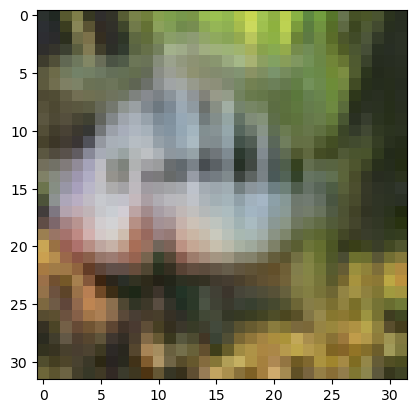

In [20]:
import matplotlib.pyplot as plt

plt.imshow(xtrain[4])

In [21]:
xtrain[0].shape

(32, 32, 3)

In [22]:
#reshape data to fit model
xtrain=xtrain.reshape(xtrain.shape[0],img_rows,img_cols,3)
xtest=xtest.reshape(xtest.shape[0],img_rows,img_cols,3)

print(xtrain.shape)
print(xtest.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [23]:
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')

In [24]:
xtrain/=255
xtest/=255

In [25]:
print('xtrain shape:',xtrain.shape)
print(xtrain.shape[0],'train samples')
print(xtest.shape[0],'test samples')

xtrain shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [26]:
#convert class vectors to binary classes matrics

ytrain=keras.utils.to_categorical(ytrain)
ytest=keras.utils.to_categorical(ytest)

In [27]:
model=Sequential()

#add model layers
model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(32,32,3)))
model.add(Dropout(0.2))

model.add(Conv2D(32,kernel_size=3,activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

#output layer
model.add(Dense(100,activation='softmax'))


In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               627300    
                                                      

In [29]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [30]:
result=model.fit(xtrain,ytrain,batch_size=batch_size,
                epochs=3,verbose=1,
                validation_data=(xtest,ytest))


Epoch 1/3
391/391 [==============================] - 70s 174ms/step - loss: 3.6566 - accuracy: 0.1650 - val_loss: 3.1947 - val_accuracy: 0.2518
Epoch 2/3
391/391 [==============================] - 68s 173ms/step - loss: 2.9323 - accuracy: 0.2993 - val_loss: 2.9522 - val_accuracy: 0.2893
Epoch 3/3
391/391 [==============================] - 68s 173ms/step - loss: 2.5870 - accuracy: 0.3653 - val_loss: 2.8280 - val_accuracy: 0.3243


In [31]:
score=model.evaluate(xtest,ytest,verbose=0)
print('Test Loss:',score[0])
print()
print('Test accuracy',score[1])

Test Loss: 2.8279998302459717

Test accuracy 0.32429999113082886


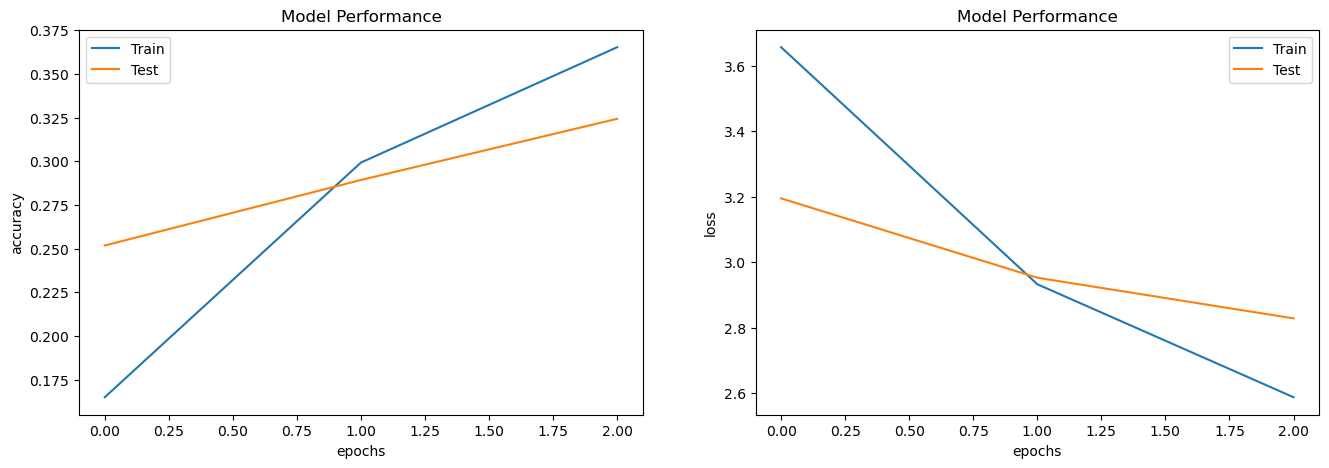

In [32]:
import matplotlib.pyplot as plt
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(16,5))

ax1.plot(result.history['accuracy'])
ax1.plot(result.history['val_accuracy'])

ax1.set_title('Model Performance')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epochs')
ax1.legend(['Train','Test'])
ax2.plot(result.history['loss'])
ax2.plot(result.history['val_loss'])

ax2.set_title('Model Performance')
ax2.set_ylabel('loss')
ax2.set_xlabel('epochs')
ax2.legend(['Train','Test'])